In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **CNN LSTM**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Greeshmanth - Ann/IMDBDatasetfinal.csv')

# Preprocess the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['review'])
sequences = tokenizer.texts_to_sequences(data['review'])
X = pad_sequences(sequences, maxlen=100)

# Split the data into training and testing sets
y = np.array(data['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
input_layer = Input(shape=(100,))
embedding_layer = Embedding(input_dim=5000, output_dim=32, input_length=100)(input_layer)
conv1_layer = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(embedding_layer)
pool1_layer = MaxPooling1D(pool_size=2)(conv1_layer)
lstm1_layer = LSTM(units=32, dropout=0.2, recurrent_dropout=0.2)(pool1_layer)
dense1_layer = Dense(units=64, activation='relu')(lstm1_layer)
dropout1_layer = Dropout(rate=0.5)(dense1_layer)
output_layer = Dense(units=1, activation='sigmoid')(dropout1_layer)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)




Epoch 1/20
625/625 [==============================] - 51s 75ms/step - loss: 0.4071 - accuracy: 0.8022 - val_loss: 0.3058 - val_accuracy: 0.8679
Epoch 2/20
625/625 [==============================] - 46s 74ms/step - loss: 0.2806 - accuracy: 0.8868 - val_loss: 0.2929 - val_accuracy: 0.8743
Epoch 3/20
625/625 [==============================] - 49s 78ms/step - loss: 0.2402 - accuracy: 0.9051 - val_loss: 0.3027 - val_accuracy: 0.8633
Epoch 4/20
625/625 [==============================] - 47s 75ms/step - loss: 0.2017 - accuracy: 0.9236 - val_loss: 0.3278 - val_accuracy: 0.8704
Epoch 5/20
625/625 [==============================] - 46s 74ms/step - loss: 0.1651 - accuracy: 0.9406 - val_loss: 0.3370 - val_accuracy: 0.8673
Epoch 6/20
625/625 [==============================] - 47s 75ms/step - loss: 0.1305 - accuracy: 0.9537 - val_loss: 0.4180 - val_accuracy: 0.8555
Epoch 7/20
625/625 [==============================] - 47s 76ms/step - loss: 0.1021 - accuracy: 0.9637 - val_loss: 0.4405 - val_accuracy:

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


313/313 [==============================] - 5s 14ms/step - loss: 0.8401 - accuracy: 0.8549
Test Loss: 0.8401174545288086
Test Accuracy: 0.8549000024795532


In [ ]:
# Save the model and weights
model.save('/content/drive/MyDrive/Greeshmanth - Ann/sentiment_model_cnn_lstm.h5')
model.save_weights('/content/drive/MyDrive/Greeshmanth - Ann/sentiment_model_weights_cnn_lstm.h5')

# Load the saved model and weights
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Greeshmanth - Ann/sentiment_model_cnn_lstm.h5')
loaded_model.load_weights('/content/drive/MyDrive/Greeshmanth - Ann/sentiment_model_weights_cnn_lstm.h5')

# Take review from user and evaluate positive or negative
new_review = input('Enter a review: ')
new_sequence = tokenizer.texts_to_sequences([new_review])
new_X = pad_sequences(new_sequence, maxlen=100)

# Make prediction on new review
prediction = loaded_model.predict(new_X)

# Print the prediction
if prediction > 0.5:
    print('The review is positive.')
else:
    print('The review is negative.')

Enter a review: the movie is bad and not interesting.
1/1 [==============================] - 0s 389ms/step
The review is negative.


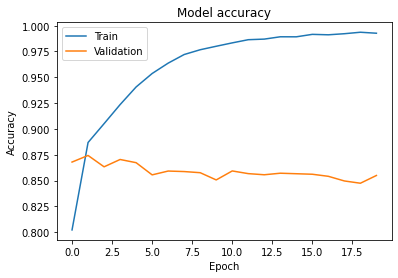

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

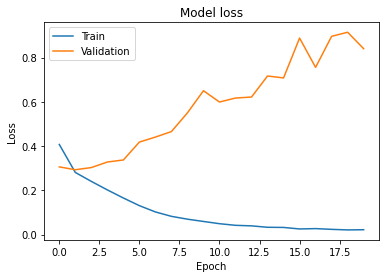

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()